In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Numero maximo de pixeles blancos en filas (maxfill): 56100
Filas con pixeles blancos >= 0.95 * maxfill: [ 12 100]


(0.0, 512.0)

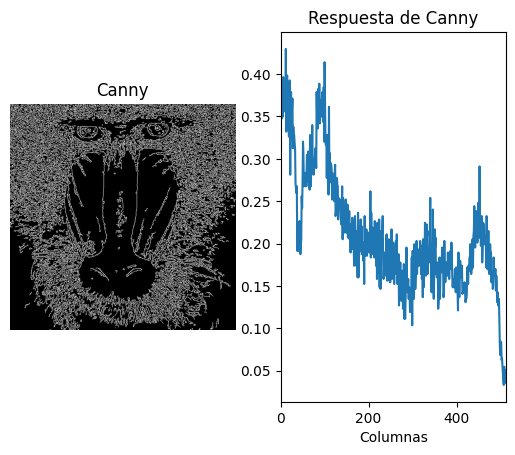

In [3]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = row_counts[:,0] / (255 * canny.shape[1])

maxfill = np.max(row_counts)

#Encuentra las filas con un numero de pixeles blamcos >= 0.95 x maxfill
threshold = 0.95*maxfill
indices = np.where(row_counts >= threshold)[0]

print("Numero maximo de pixeles blancos en filas (maxfill):", maxfill)
print("Filas con pixeles blancos >= 0.95 * maxfill:", indices)


plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA 2: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen.

Numero maximo de pixeles no nulos en filas (maxfill): 153
Filas con pixeles nulos >= 0.95 * maxfill: [126]
Numero maximo de pixeles no nulos en columnas (maxfill): 168
Columnas con pixeles nulos >= 0.95 * maxfill: [ 0  1 24 83 92]


(0.0, 512.0)

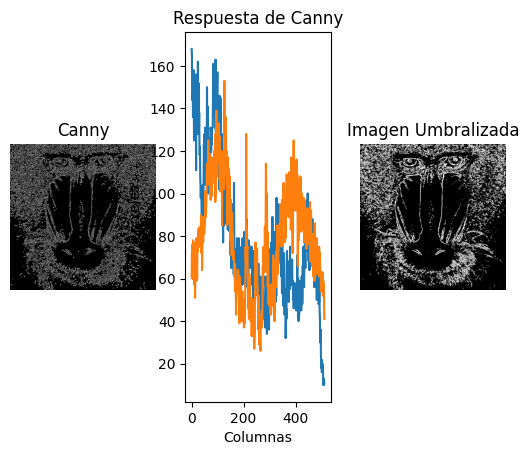

In [4]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

#Convertimos el sobel a 8 bits
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Define valor umbrals
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)

canny = cv2.Canny(imagenUmbralizada, 100, 200)

#Recojo los pixeles no nulos (columnas)
col_counts_non_zero = np.array([cv2.countNonZero(canny[i:i+1, :]) for i in range(canny.shape[0])])

#Recojo los pixeles no nulos (filas)
row_counts_non_zero = np.array([cv2.countNonZero(canny[:, j:j+1]) for j in range(canny.shape[1])])

maxfill_rows = np.max(row_counts_non_zero)
maxfill_cols = np.max(col_counts_non_zero)

#Encuentra las filas con un numero de pixeles nulos >= 0.95 x maxfill
threshold_rows = 0.95*maxfill_rows
indices_rows = np.where(row_counts_non_zero >= threshold_rows)[0]

#Encuentra las columnas con un numero de pixeles nulos >= 0.95 x maxfill
threshold_cols = 0.95*maxfill_cols
indices_cols = np.where(col_counts_non_zero >=threshold_cols)[0]

print("Numero maximo de pixeles no nulos en filas (maxfill):", maxfill_rows)
print("Filas con pixeles nulos >= 0.95 * maxfill:", indices_rows)

print("Numero maximo de pixeles no nulos en columnas (maxfill):", maxfill_cols)
print("Columnas con pixeles nulos >= 0.95 * maxfill:", indices_cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(col_counts_non_zero)
plt.plot(row_counts_non_zero)

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA 3: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [5]:
import cv2

# Inicializa la captura de video
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Funciones para mostrar diferentes fotogramas
def mostrar_imagen_sin_filtro(framem):
    cv2.putText(framem, "Sin filtro", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Fotograma actual', framem)

def mostrar_fotograma_fantasmal(framem, objetos):
    cv2.putText(objetos, "Fotograma Fantasmal", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Fotograma actual', objetos)

def mostrar_fondo(background):
    cv2.putText(background, "Fondo", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Fotograma actual', background)

# Diccionario tipo switch
def switch_case(opcion, background, objetos, framem):
    opciones = {
        1: lambda: mostrar_imagen_sin_filtro(framem),
        2: lambda: mostrar_fondo(background),
        3: lambda: mostrar_fotograma_fantasmal(framem, objetos)
    }
    
    
    # Ejecuta la opción correspondiente, si no existe, no hace nada
    return opciones.get(opcion, lambda: None)()

# Opción inicial
opcion = 1  # Puedes cambiar esta variable para alternar entre 1 y 2
def detectar_mano(framem):
    # Convertir el fotograma de BGR a HSV
    hsv = cv2.cvtColor(framem, cv2.COLOR_BGR2HSV)
    
    # Definir el rango de color para la piel (ajusta estos valores según tu iluminación)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    
    # Crear una máscara para extraer los colores que están en el rango de la piel
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    
    # Aplicar algunas transformaciones morfológicas para eliminar el ruido
    mask = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)
    mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=1)
    
    # Encontrar los contornos en la máscara
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Si se encuentran contornos
    if contours:
        # Encontrar el contorno más grande por área
        max_contour = max(contours, key=cv2.contourArea)
        
        # Encontrar el círculo más pequeño que puede encerrar el contorno
        (x, y), radius = cv2.minEnclosingCircle(max_contour)
        
        # Convertir las coordenadas y el radio a enteros
        center = (int(x), int(y))
        radius = int(radius)
        
        # Dibujar el círculo en el fotograma
        if radius > 10:  # Ignorar círculos demasiado pequeños
            cv2.circle(framem, center, radius, (0, 255, 0), 2)
    
    return framem
while True:
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem = cv2.flip(frame, 1)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        
        objetos = eliminadorFondo.apply(framem)
        background = eliminadorFondo.getBackgroundImage()
        frame_con_circulo = detectar_mano(background)
        # Dibuja un círculo en el punto de máxima intensidad de los objetos detectados
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(objetos)
        cv2.circle(objetos, max_loc, 100, (255, 255, 255), 2)
        

        # Llama al switch-case para mostrar la opción seleccionada
        switch_case(opcion, frame_con_circulo, objetos, framem)

    # Detecta si se presionó '1' o '2' para cambiar la opción
    key = cv2.waitKey(20)
    if key == 27:  # ESC para salir
        break
    elif key == ord('1'):
        opcion = 1
    elif key == ord('2'):
        opcion = 2
    elif key == ord('3'):
        opcion = 3
# Libera el objeto de captura
vid.release()
# Destruye las ventanas
cv2.destroyAllWindows()


TAREA 4: Tras ver los vídeos My little piece of privacy, Messa di voce y Virtual air guitar proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones. (Virtual air guitar)

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import pygame
import numpy as np
import matplotlib.pyplot as plt

# Inicializa pygame y el mezclador de sonido
pygame.mixer.init()

# Carga los sonidos (asegúrate de que los archivos estén en la misma carpeta)
sound_c1 = pygame.mixer.Sound('d.wav')
sound_c2 = pygame.mixer.Sound('La.wav')
sound_c3 = pygame.mixer.Sound('Re.wav')

# Inicializa el detector de manos
detector = HandDetector(detectionCon=0.3, maxHands=2)

# Inicializa la cámara
cap = cv2.VideoCapture(0)


# Obtén el tamaño de la ventana de la cámara
max_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
max_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    success, img = cap.read()
    if not success:
        break

    # Detecta manos en la imagen
    hands, img = detector.findHands(img)  # Agrega recuadros a las manos

    # Verifica si se detectan dos manos
    if len(hands) == 2:
        # Identificar mano izquierda y derecha
        for hand in hands:
            if hand["type"] == "Left":  # Mano izquierda
                hand_left = hand
            elif hand["type"] == "Right":  # Mano derecha
                hand_right = hand

        # Coordenadas de la mano izquierda
        x_left, y_left = hand_left['center']

        # Dibuja la línea desde la esquina inferior izquierda hasta la mano izquierda
        cv2.line(img, (0, max_height), (x_left, y_left), (0, 255, 0), 3)

        # Coordenadas de la mano derecha
        x_right, y_right = hand_right['center']

        # Función para calcular si la mano derecha está cerca de la línea
        def distance_to_line(x0, y0, x1, y1, x2, y2):
            """ Calcula la distancia del punto (x0, y0) a la línea que pasa por (x1, y1) y (x2, y2). """
            return abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

        # Calcula la distancia de la mano derecha a la línea
        dist = distance_to_line(x_right, y_right, 0, max_height, x_left, y_left)

        # Determina el umbral de cercanía a la línea para tocar una nota
        threshold = 20

        # Dependiendo de la posición en la línea y la distancia, se tocan diferentes notas
        if dist < threshold:  # Si la mano derecha está cerca de la línea
            # Calcula la posición en la línea en proporción al ancho de la imagen
            hand_right_position_ratio = x_right / max_width
            if hand_right_position_ratio < 0.33:
                sound_c1.play()  # Primera nota
            elif 0.33 <= hand_right_position_ratio < 0.66:
                sound_c2.play()  # Segunda nota
            else:
                sound_c3.play()  # Tercera nota

        # Visualiza la posición y la distancia de la mano derecha a la línea
        cv2.putText(img, f'Dist to line: {int(dist)}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
    # Muestra el video con la detección de las manos
    cv2.imshow("Air Guitar", img)

    # Salir si se presiona la tecla 'ESC'
    key = cv2.waitKey(20)
    if key == 27:  # ESC para salir
        break

# Libera la cámara y cierra las ventanas
cap.release()
cv2.destroyAllWindows()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
